# Cryptocurrency Price Prediction Using Machine Learning Model

### Project Outline
1. Data Collection
   * Cryptocurrency dataset
   * Data summary
   
2.	Data Preparation
   * data cleaning
   
3. Exploratory Data Analysis
   * Develop and interpret insights (use plotly)
   
4. Data Preparation
   * Feature Extraction
   * data standardization (best method) 
   * outlier handling 
  
5.	Model building
   * Hybrid Model
         * Random Forest
         * Logistic Regression
         * MLP 
         * Boosting Algorithms
    
6.	Performance Evaluation
    * Accuracy 
    * RMSE
    * MSE
    * R2 etc.

7. System Design for Development

## 1. Data Collection

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
column = ['id', 'name', 'symbol','slug', 'num_market_pairs', 'date_added', 'max_supply', 'circulating_supply', 'total_supply', 'platform_id', 'platform_name', 'platform_symbol', 'platform_slug', 'platform_token_address', 'cmc_rank', 'last_updated', 'price', 'volume_24h', 'percent_change_1h','percent_change_24h', 'percent_change_7d', 'percent_change_30d', 'percent_change_60d','percent_change_90d','market_cap','extracted_time','count']
data = pd.read_csv('all_crypto_half_hour.csv', names=column)

### Data Summary

In [3]:
data.shape

(147500, 27)

In [4]:
data.describe()

,id,num_market_pairs,max_supply,circulating_supply,total_supply,platform_id,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,count
count,147500.000000,147500.000000,8.864100e+04,1.475000e+05,1.475000e+05,67688.000000,147500.000000,147500.000000,1.475000e+05,147500.000000,147500.000000,147500.000000,147264.000000,146960.000000,146138.000000,1.475000e+05,147500.00000
mean,3223.271695,437.605186,2.399634e+10,7.744149e+11,1.936577e+12,1240.406246,50.500088,1694.657129,2.526269e+09,0.226897,1.321417,10.416991,84.967811,356.828656,931.441187,1.406936e+10,73749.50000
std,1968.942139,1618.066034,3.358915e+12,1.726125e+13,4.368224e+13,402.340324,28.866322,7804.158106,4.684698e+10,40.312906,59.668360,114.679009,916.459624,4098.767034,10130.905196,7.797088e+10,42579.72669
min,1.000000,6.000000,0.000000e+00,1.220869e+04,0.000000e+00,1027.000000,1.000000,0.000002,1.069495e+05,-93.509938,-64.066222,-74.246920,-69.989561,-75.040697,-82.340493,3.314007e+08,0.00000
25%,1808.000000,51.000000,1.000000e+08,9.434696e+07,1.163133e+08,1027.000000,25.750000,0.707034,8.420353e+07,-0.952336,-3.690386,-6.421068,-1.212164,28.572909,87.004422,1.021076e+09,36874.75000
50%,2682.000000,115.000000,1.000000e+09,5.600000e+08,1.000000e+09,1027.000000,50.500000,3.574515,2.361194e+08,-0.094281,-0.353498,1.120731,16.769890,88.726261,229.112258,1.731225e+09,73749.50000
75%,4256.000000,227.000000,9.000000e+09,5.586355e+09,9.000000e+09,1027.000000,75.250000,26.930959,7.440525e+08,0.827192,4.119006,15.213778,62.067034,226.208938,537.374417,4.055476e+09,110624.25000
max,9436.000000,13521.000000,1.000000e+15,4.868670e+14,1.000000e+15,2502.000000,104.000000,60749.002288,1.300310e+13,8584.693875,8141.373225,14074.879960,54575.463765,248058.842740,471389.964084,8.785128e+11,147499.00000


## Feature Selection

In [5]:
df = data[['name', 'last_updated', 'num_market_pairs', 'total_supply', 'cmc_rank', 'market_cap', 
           'percent_change_1h', 'percent_change_24h','percent_change_7d', 
           'percent_change_30d', 'percent_change_60d','percent_change_90d']]

In [6]:
df.head()

,name,last_updated,num_market_pairs,total_supply,cmc_rank,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d
0,Bitcoin,2021-03-18T19:56:04.000Z,9873,1.865743e+07,1,7.723507e+11,-3.107614,-0.291386,-2.153760,18.438645,61.139199,152.875961
1,Ethereum,2021-03-18T19:56:02.000Z,6233,1.151035e+08,2,1.464554e+11,-2.833473,-3.302048,-4.479624,0.640296,44.125517,174.312956
2,Cardano,2021-03-18T19:55:18.000Z,259,4.500000e+10,3,2.883309e+10,-1.816408,-0.164829,9.395966,43.959893,231.059643,669.445435
3,Binance Coin,2021-03-18T19:55:13.000Z,601,1.705328e+08,4,2.878574e+10,-2.034368,-1.271910,-13.629409,100.113801,484.769191,746.765119
4,Tether,2021-03-18T19:55:15.000Z,11498,4.063634e+10,5,2.794155e+10,-0.052728,-0.565062,-2.366472,0.038261,0.039952,0.026013


## Separation of Date and Timestep

In [7]:
df_sep = pd.DataFrame(df.last_updated.str.split('T',1).tolist(), columns = ['last_date','timestep'])
df['last_date'] = df_sep['last_date'].tolist()
df = df.drop('last_updated', axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# adding price
df['price'] = data['price'].tolist()

In [9]:
df.head()

,name,num_market_pairs,total_supply,cmc_rank,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,last_date,price
0,Bitcoin,9873,1.865743e+07,1,7.723507e+11,-3.107614,-0.291386,-2.153760,18.438645,61.139199,152.875961,2021-03-18,41396.411103
1,Ethereum,6233,1.151035e+08,2,1.464554e+11,-2.833473,-3.302048,-4.479624,0.640296,44.125517,174.312956,2021-03-18,1272.380724
2,Cardano,259,4.500000e+10,3,2.883309e+10,-1.816408,-0.164829,9.395966,43.959893,231.059643,669.445435,2021-03-18,0.902492
3,Binance Coin,601,1.705328e+08,4,2.878574e+10,-2.034368,-1.271910,-13.629409,100.113801,484.769191,746.765119,2021-03-18,186.275926
4,Tether,11498,4.063634e+10,5,2.794155e+10,-0.052728,-0.565062,-2.366472,0.038261,0.039952,0.026013,2021-03-18,0.718866


In [10]:
df.shape

(147500, 13)

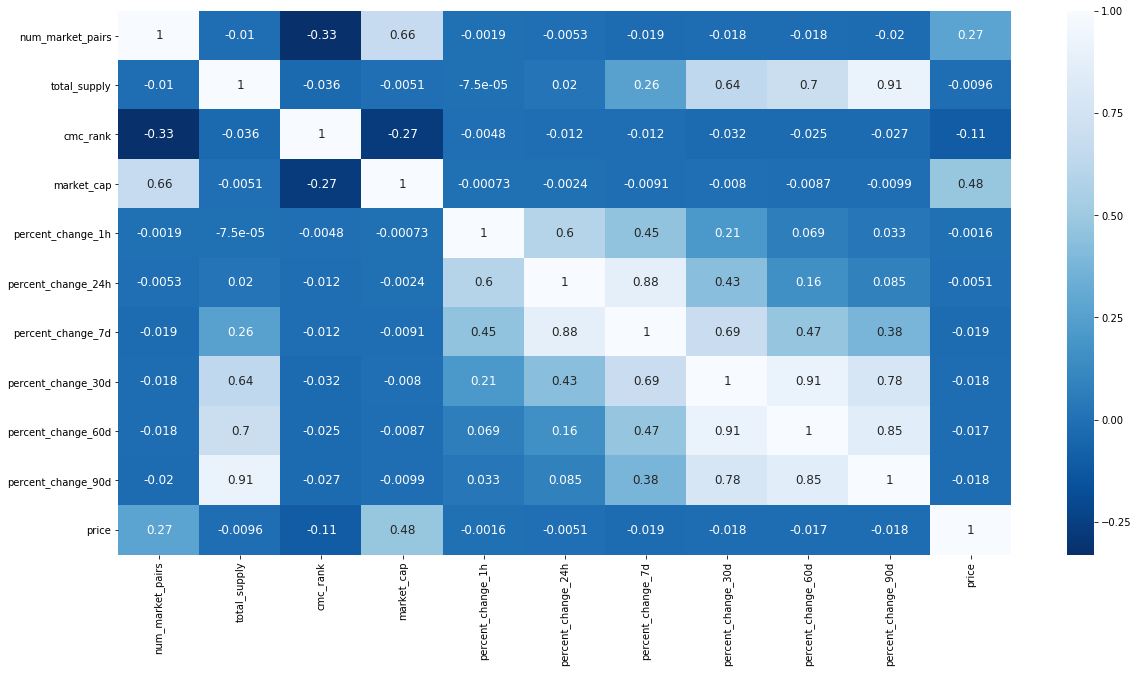

In [11]:
# make a correlation plot (heatmap)
corr_mx = df.corr()
f, ax = plt.subplots(figsize=(20,10)) 
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':12}, cmap='Blues_r')

### Data Cleaning

In [12]:
df.isnull().sum()

name                     0
num_market_pairs         0
total_supply             0
cmc_rank                 0
market_cap               0
percent_change_1h        0
percent_change_24h       0
percent_change_7d        0
percent_change_30d     236
percent_change_60d     540
percent_change_90d    1362
last_date                0
price                    0
dtype: int64

In [13]:
df['name'].nunique()

139

In [15]:
df_clean = df.fillna(df.mean())

In [16]:
df_clean.shape

(147500, 13)

In [17]:
df_clean.isnull().sum()

name                  0
num_market_pairs      0
total_supply          0
cmc_rank              0
market_cap            0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
percent_change_30d    0
percent_change_60d    0
percent_change_90d    0
last_date             0
price                 0
dtype: int64

In [18]:
df_clean['name'].nunique()

139

In [19]:
df_clean.head()

,name,num_market_pairs,total_supply,cmc_rank,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,last_date,price
0,Bitcoin,9873,1.865743e+07,1,7.723507e+11,-3.107614,-0.291386,-2.153760,18.438645,61.139199,152.875961,2021-03-18,41396.411103
1,Ethereum,6233,1.151035e+08,2,1.464554e+11,-2.833473,-3.302048,-4.479624,0.640296,44.125517,174.312956,2021-03-18,1272.380724
2,Cardano,259,4.500000e+10,3,2.883309e+10,-1.816408,-0.164829,9.395966,43.959893,231.059643,669.445435,2021-03-18,0.902492
3,Binance Coin,601,1.705328e+08,4,2.878574e+10,-2.034368,-1.271910,-13.629409,100.113801,484.769191,746.765119,2021-03-18,186.275926
4,Tether,11498,4.063634e+10,5,2.794155e+10,-0.052728,-0.565062,-2.366472,0.038261,0.039952,0.026013,2021-03-18,0.718866


## Label Encoding

In [20]:
X = df_clean.iloc[:,:-1]

# ordinal encode input variables
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
X_ord = ordinal.fit_transform(X[['name', 'last_date']])

ddf = pd.DataFrame(X_ord, columns=['names', 'last_dates'])

X['names'] = ddf.iloc[:, :-1].values
X['last_dates'] = ddf.iloc[:, -1:].values

X.drop(['name', 'last_date'], axis=1, inplace=True)

In [21]:
X.head()

,num_market_pairs,total_supply,cmc_rank,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,names,last_dates
0,9873,1.865743e+07,1,7.723507e+11,-3.107614,-0.291386,-2.153760,18.438645,61.139199,152.875961,15.0,0.0
1,6233,1.151035e+08,2,1.464554e+11,-2.833473,-3.302048,-4.479624,0.640296,44.125517,174.312956,45.0,0.0
2,259,4.500000e+10,3,2.883309e+10,-1.816408,-0.164829,9.395966,43.959893,231.059643,669.445435,22.0,0.0
3,601,1.705328e+08,4,2.878574e+10,-2.034368,-1.271910,-13.629409,100.113801,484.769191,746.765119,12.0,0.0
4,11498,4.063634e+10,5,2.794155e+10,-0.052728,-0.565062,-2.366472,0.038261,0.039952,0.026013,114.0,0.0


## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X_std = trans.fit_transform(X)

In [23]:
y = np.log(df.iloc[:,-1:])
y

,price
0,10.630949
1,7.148645
2,-0.102596
3,5.227229
4,-0.330080
5,3.245019
6,-1.074969
7,3.064941
8,4.972040
9,3.042810


## Model Building Codes

#### Hybrid Model
         * Random Forest
         * Logistic Regression
         * MLP 
         * Boosting Algorithms

In [24]:
# split data into train and validation data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

## Model 1

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

rfr_model = RandomForestRegressor() 

rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_rfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_rfr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rfr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rfr_model.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


MAE: 0.002325050824405825
MSE: 0.00018518509528297764
RMSE: 0.013608273045577005
R2_score: 0.9999845986068546
__________________________________________

Accuracy on train data: 0.9999911170933959
Accuracy on test data: 0.9999845986068546


In [26]:
y_test.shape

(29500, 1)

In [38]:
x.shape

(1, 29500)

In [39]:
x.reshape(29500, 1)

array([[    0],
       [    1],
       [    2],
       ...,
       [29497],
       [29498],
       [29499]])

In [42]:
x.shape

(1, 29500)

In [37]:
y_pred_rfr.shape

(29500,)

Text(0.5, 1.0, 'Randon Forest')

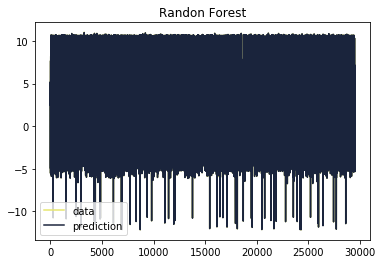

In [43]:
np.random.seed(0)
x = np.array([i for i in range(29500)]).reshape(y_test.shape)
t = np.array([i for i in range(29500)]).reshape(y_pred_rfr.shape)


plt.plot(x, y_test, color="#E7E76F", label="data")
plt.plot(t, y_pred_rfr, color="#1A243C", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("Randon Forest")


In [58]:
y_test.shape

(29500, 1)

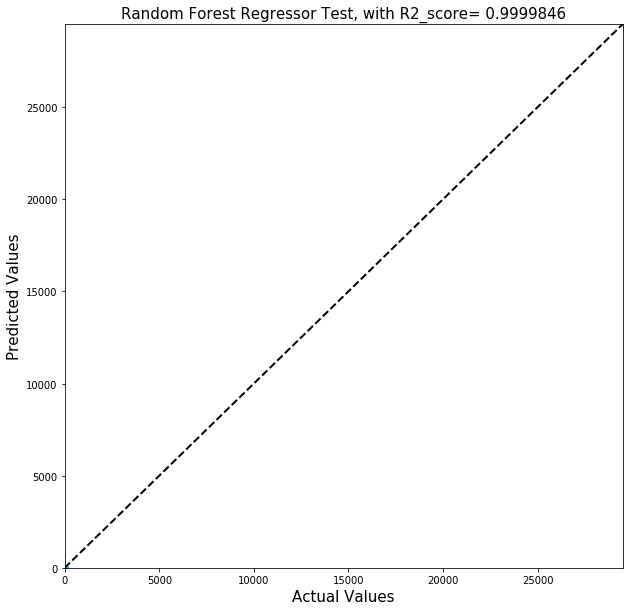

In [44]:
# Output of predicted values against Actual values.
plt.figure(figsize=(10, 10))
plt.axis([0, 29500, 00, 29500])
plt.scatter(y_test, y_pred_rfr, color='#4CB5F5')
plt.plot([0, 29500], [0, 29500], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Values', fontsize=15)
plt.xlabel('Actual Values', fontsize=15)
plt.title(f'Random Forest Regressor Test, with R2_score= {round(r2_score(y_test, y_pred_rfr), 8)}', fontsize=15)
plt.show()

## Model 2

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor()
knr_model.fit(X_train, y_train)

y_pred_knr = knr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_knr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_knr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_knr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_knr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(knr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(knr_model.score(X_test, y_test)))

MAE: 0.024669109199796913
MSE: 0.04452261236176046
RMSE: 0.21100382072787321
R2_score: 0.9962971628154221
__________________________________________

Accuracy on train data: 0.9977884055855019
Accuracy on test data: 0.9962971628154221


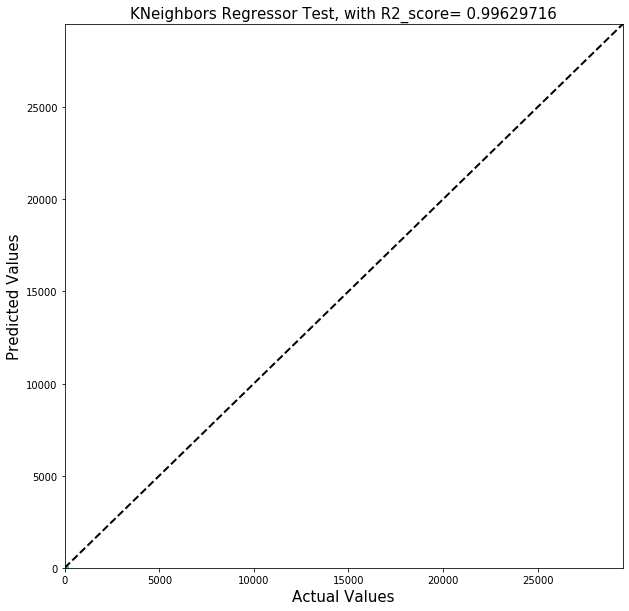

In [46]:
# Output of predicted values against Actual values.
plt.figure(figsize=(10, 10))
plt.axis([0, 29500, 00, 29500])
plt.scatter(y_test, y_pred_knr, color='#4CB5F5')
plt.plot([0, 29500], [0, 29500], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Values', fontsize=15)
plt.xlabel('Actual Values', fontsize=15)
plt.title(f'KNeighbors Regressor Test, with R2_score= {round(r2_score(y_test, y_pred_knr), 8)}', fontsize=15)
plt.show()

In [47]:
# pip install xgboost

## Model 3

In [48]:
# Logistic Regression
# Boosting Algorithm (AdaBoostRegressor)

from xgboost import XGBRegressor
xgbr_model = XGBRegressor(random_state = 0)
xgbr_model.fit(X_train, y_train)

y_pred_xgbr = xgbr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_xgbr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_xgbr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_xgbr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(xgbr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(xgbr_model.score(X_test, y_test)))

MAE: 0.025994274835451105
MSE: 0.001425599430577366
RMSE: 0.037757110993524995
R2_score: 0.9998814363690306
__________________________________________

Accuracy on train data: 0.9999011191621506
Accuracy on test data: 0.9998814363690306


In [52]:
# Output of predicted values against Actual values.
plt.figure(figsize=(10, 10))
plt.axis([0, 29500, 00, 29500])
plt.scatter([0, 29500], y_pred_xgbr, color='#4CB5F5')
plt.plot([0, 29500],y_test color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Values', fontsize=15)
plt.xlabel('Actual Values', fontsize=15)
plt.title(f'XG Boost Regressor Test, with R2_score= {round(r2_score(y_test, y_pred_xgbr), 8)}', fontsize=15)
plt.show()

SyntaxError: invalid syntax (<ipython-input-52-a499ae3720cc>, line 5)

## Model 4

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state = 0)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_gbr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_gbr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_gbr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(gbr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(gbr_model.score(X_test, y_test)))

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MAE: 0.2174129989777301
MSE: 0.09693451346400403
RMSE: 0.3113430800001889
R2_score: 0.9919381927096498
__________________________________________

Accuracy on train data: 0.9920935294278282
Accuracy on test data: 0.9919381927096498


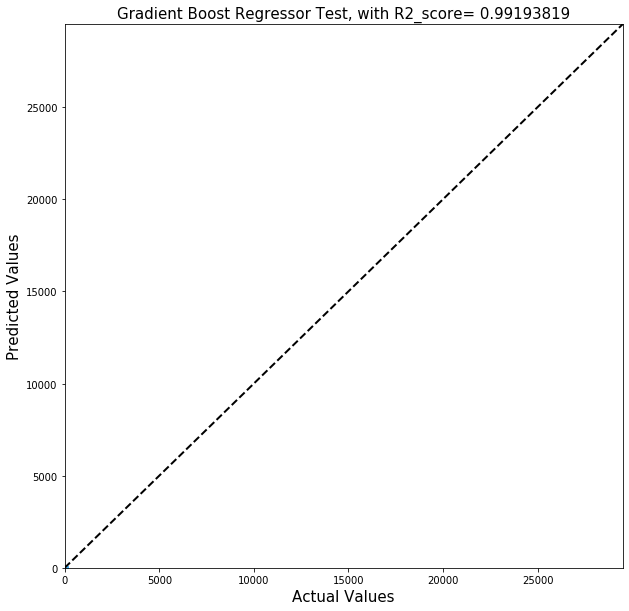

In [54]:
# Output of predicted values against Actual values.
plt.figure(figsize=(10, 10))
plt.axis([0, 29500, 00, 29500])
plt.scatter(y_test, y_pred_gbr, color='#4CB5F5')
plt.plot([0, 29500], [0, 29500], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Values', fontsize=15)
plt.xlabel('Actual Values', fontsize=15)
plt.title(f'Gradient Boost Regressor Test, with R2_score= {round(r2_score(y_test, y_pred_gbr), 8)}', fontsize=15)
plt.show()

## Hybrid Model: Voting Regressor

The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

In [55]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Training classifiers
reg1 = RandomForestRegressor() 
reg2 = KNeighborsRegressor()
reg3 = XGBRegressor(random_state = 0)
reg4 = GradientBoostingRegressor(random_state = 0)

ereg = VotingRegressor(estimators=[('rf', reg1), ('kn', reg2), ('xg', reg3), ('gb', reg4)])
ereg = ereg.fit(X_train, y_train)

y_pred_vr = ereg.predict(X_test)

print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred_vr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred_vr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_vr))))
print('R2_score: {}'.format(r2_score(y_test, y_pred_vr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(ereg.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(ereg.score(X_test, y_test)))

C:\Users\EBEN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MAE: 0.059376889549999916
MSE: 0.009414123252407543
RMSE: 0.09702640492364717
R2_score: 0.9992170503079205
__________________________________________

Accuracy on train data: 0.9993335748259592
Accuracy on test data: 0.9992170503079205


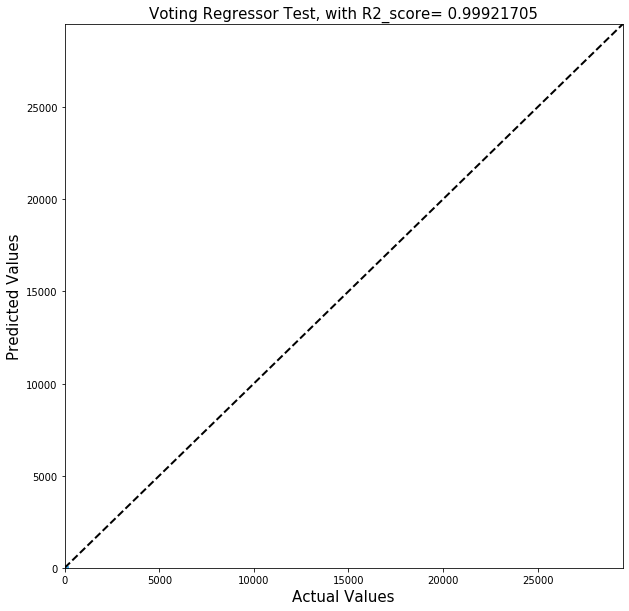

In [56]:
# Output of predicted values against Actual values.
plt.figure(figsize=(10, 10))
plt.axis([0, 29500, 00, 29500])
plt.scatter(y_test, y_pred_vr, color='#4CB5F5')
plt.plot([0, 29500], [0, 29500], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Values', fontsize=15)
plt.xlabel('Actual Values', fontsize=15)
plt.title(f'Voting Regressor Test, with R2_score= {round(r2_score(y_test, y_pred_vr), 8)}', fontsize=15)
plt.show()

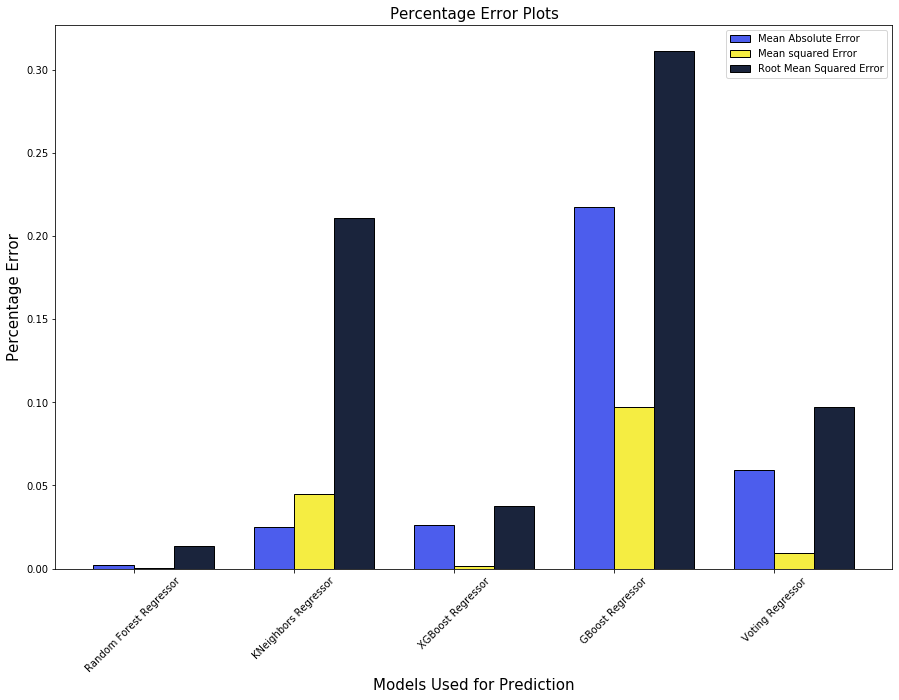

In [59]:
# Percentage Error plot
Model = ['Random Forest Regressor', 'KNeighbors Regressor', 'XGBoost Regressor', 'GBoost Regressor', 'Voting Regressor']
MAE = [metrics.mean_absolute_error(y_test, y_pred_rfr), metrics.mean_absolute_error(y_test, y_pred_knr), 
       metrics.mean_absolute_error(y_test, y_pred_xgbr), metrics.mean_absolute_error(y_test, y_pred_gbr),
       metrics.mean_absolute_error(y_test, y_pred_vr)]
MSE = [metrics.mean_squared_error(y_test, y_pred_rfr), metrics.mean_squared_error(y_test, y_pred_knr), 
       metrics.mean_squared_error(y_test, y_pred_xgbr), metrics.mean_squared_error(y_test, y_pred_gbr), 
       metrics.mean_squared_error(y_test, y_pred_vr)]
RMSE = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_knr)), 
       np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbr)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)), 
       np.sqrt(metrics.mean_squared_error(y_test, y_pred_vr))]

n = 5
r = np.arange(n)
width = 0.25
plt.figure(figsize=(15, 10))
plt.bar(r, MAE, color = '#4C5DED', width=width, edgecolor = 'black', label = 'Mean Absolute Error')
plt.bar(r+width, MSE, color = '#F5ED42', width=width, edgecolor = 'black', label = 'Mean squared Error')
plt.bar(r+width*2, RMSE, color = '#1A243C', width=width, edgecolor = 'black', label = 'Root Mean Squared Error')

plt.xlabel('Models Used for Prediction', fontsize=15)
plt.ylabel('Percentage Error', fontsize=15)
plt.title('Percentage Error Plots', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Model)
plt.legend()
  
plt.show()

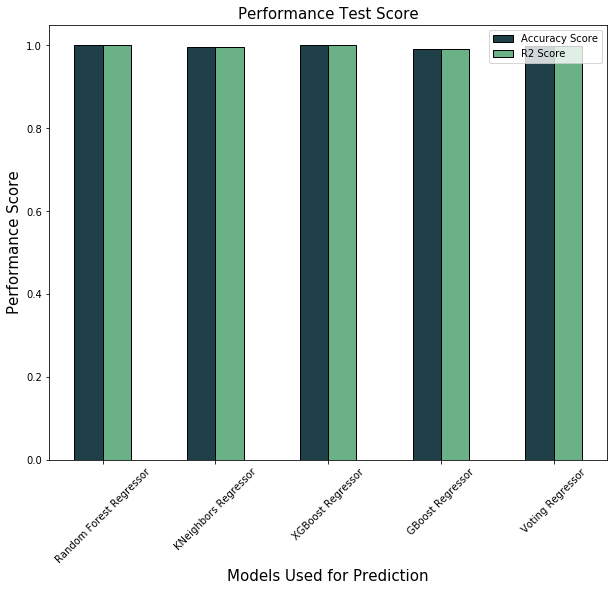

In [60]:
# plots for Accuracy Score

Accuracy = [rfr_model.score(X_test, y_test), knr_model.score(X_test, y_test), xgbr_model.score(X_test, y_test),
            gbr_model.score(X_test, y_test), ereg.score(X_test, y_test),]

R2_score = [r2_score(y_test, y_pred_rfr), r2_score(y_test, y_pred_knr), r2_score(y_test, y_pred_xgbr),
           r2_score(y_test, y_pred_gbr), r2_score(y_test, y_pred_vr)]

n = 5
r = np.arange(n)
width = 0.25
plt.figure(figsize=(10, 8))
plt.bar(r, Accuracy, color='#1F3F49', width=width, edgecolor = 'black', label = 'Accuracy Score')
plt.bar(r+width, R2_score, color = '#6AB187', width=width, edgecolor = 'black', label = 'R2 Score')

plt.xlabel('Models Used for Prediction', fontsize=15)
plt.ylabel('Performance Score', fontsize=15)
plt.title('Performance Test Score', fontsize=15)

plt.tick_params(axis='x', labelrotation=45)
plt.xticks(r+width/2, Model)
plt.legend()
  
plt.show()

### Validation

In [57]:
X_valid = pd.read_csv('X input Variables.csv').drop(columns='Unnamed: 0')
X_valid.head()

,num_market_pairs,total_supply,cmc_rank,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,names,last_dates
0,7,2.222952e+08,100,5.904653e+08,-0.017046,17.021114,-9.940169,-28.465783,-44.956713,289.464181,109.0,0.0
1,9545,1.869198e+07,1,7.245739e+11,-0.652594,7.768104,-5.438222,-3.829042,7.811478,67.712762,13.0,0.0
2,6311,1.156305e+08,2,2.068818e+11,-1.638071,7.346893,12.053015,45.260743,55.454594,87.123173,40.0,0.0
3,579,1.694329e+08,3,5.917943e+10,-0.505596,5.898505,3.354161,102.262526,115.035977,1201.560300,10.0,0.0
4,664,9.999083e+10,4,4.312739e+10,2.334920,20.477127,-5.642643,136.924109,183.249433,395.755705,113.0,0.0


In [58]:
X_validate = trans.fit_transform(X_valid)

In [59]:
X_validate

array([[-0.26556795, -0.06836878,  1.71475615, ..., -0.06524027,
         1.49524187, -1.53413172],
       [ 5.50842621, -0.06837179, -1.71481464, ..., -0.07945634,
        -1.33308061, -1.53413172],
       [ 3.55066807, -0.06837035, -1.68017251, ..., -0.07821198,
        -0.53761491, -1.53413172],
       ...,
       [-0.22077076, -0.06824047,  1.64547189, ..., -0.08643125,
         0.61139109,  2.25679369],
       [-0.23227274, -0.06822438,  1.68011402, ..., -0.0689612 ,
        -1.59823584,  2.25679369],
       [-0.22077076, -0.06836049,  1.71475615, ..., -0.0837972 ,
        -0.36084476,  2.25679369]])

In [60]:
Y = pd.read_csv('Y target varibels.csv', names=['price'])

In [61]:
Y = np.log(Y)

In [62]:
Y.head()

,price
0,0.976905
1,10.565244
2,7.489503
3,5.955066
4,-0.051442


### Random Forest

In [63]:
y_rfr_pred_ = rfr_model.predict(X_validate)
print('MAE: {}'.format(metrics.mean_absolute_error(Y, y_rfr_pred_)))
print('MSE: {}'.format(metrics.mean_squared_error(Y, y_rfr_pred_)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y, y_rfr_pred_))))
print('R2_score: {}'.format(r2_score(Y, y_rfr_pred_)))
#print('__________________________________________\n')
#print('Accuracy on train data: {}'.format(rfr_model.score(X_train, y_train)))
#print('Accuracy on test data: {}'.format(rfr_model.score(X_test, y_test)))"""

MAE: 6.849736371683743
MSE: 61.37573768233968
RMSE: 7.83426688863353
R2_score: -4.079984177327062


In [64]:
y_rfr_pred_

array([ 0.2549249 ,  9.63602271,  9.637076  , ..., 10.50614641,
        7.97506647, 10.58672267])

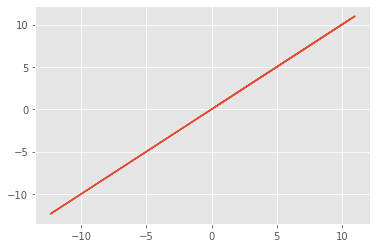

In [77]:
plt.plot(y_rfr_pred_, y_rfr_pred_)
plt.plot(Y, Y)

### KNeighbor Regressors

In [65]:
y_knr_pred_ = knr_model.predict(X_validate)

print('MAE: {}'.format(metrics.mean_absolute_error(Y, y_knr_pred_)))
print('MSE: {}'.format(metrics.mean_squared_error(Y, y_knr_pred_)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y, y_knr_pred_))))
print('R2_score: {}'.format(r2_score(Y, y_knr_pred_)))
#print('__________________________________________\n')
#print('Accuracy on train data: {}'.format(knr_model.score(X_train, y_train)))
#print('Accuracy on test data: {}'.format(knr_model.score(X_test, y_test)))

MAE: 1.8449953996176516
MSE: 8.375491960762908
RMSE: 2.8940442223233056
R2_score: 0.30677221578636604


In [67]:
y_knr_pred_

array([[ 0.89028084],
       [10.60855249],
       [ 7.19495643],
       ...,
       [-2.66376476],
       [-2.57192074],
       [-0.25463888]])

### XGBoost

In [68]:
y_xgbr_pred_ = xgbr_model.predict(X_validate)

print('MAE: {}'.format(metrics.mean_absolute_error(Y, y_xgbr_pred_ )))
print('MSE: {}'.format(metrics.mean_squared_error(Y, y_xgbr_pred_ )))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y, y_xgbr_pred_ ))))
print('R2_score: {}'.format(r2_score(Y, y_xgbr_pred_ )))
#print('__________________________________________\n')
#print('Accuracy on train data: {}'.format(xgbr_model.score(X_train, y_train)))
#print('Accuracy on test data: {}'.format(xgbr_model.score(X_test, y_test)))

MAE: 6.502905335044065
MSE: 57.507030750136266
RMSE: 7.583339023816373
R2_score: -3.759776702118762


In [70]:
y_xgbr_pred_

array([10.284561, 10.541168, 10.471878, ..., 10.347383, 10.161487,
        9.887204], dtype=float32)

### GBoost

In [71]:
y_gbr_pred_ = gbr_model.predict(X_validate)

print('MAE: {}'.format(metrics.mean_absolute_error(Y, y_gbr_pred_)))
print('MSE: {}'.format(metrics.mean_squared_error(Y, y_gbr_pred_)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y, y_gbr_pred_))))
print('R2_score: {}'.format(r2_score(Y, y_gbr_pred_)))
#print('__________________________________________\n')
#print('Accuracy on train data: {}'.format(gbr_model.score(X_train, y_train)))
#print('Accuracy on test data: {}'.format(gbr_model.score(X_test, y_test)))

MAE: 5.909015059202113
MSE: 43.91205687602096
RMSE: 6.626617302668154
R2_score: -2.6345396820910163


In [78]:
y_gbr_pred_

array([ 5.3855813 , 12.38272992, 11.31047101, ...,  6.96789865,
        8.15837587,  9.00867777])

### Voting 

In [72]:
y_vr_pred_ = ereg.predict(X_validate)

print('MAE: {}'.format(metrics.mean_absolute_error(Y, y_vr_pred_)))
print('MSE: {}'.format(metrics.mean_squared_error(Y, y_vr_pred_)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y, y_vr_pred_))))
print('R2_score: {}'.format(r2_score(Y, y_vr_pred_)))
#print('__________________________________________\n')
#print('Accuracy on train data: {}'.format(ereg.score(X_train, y_train)))
#print('Accuracy on test data: {}'.format(ereg.score(X_test, y_test)))

MAE: 4.562213764544946
MSE: 29.147777211880257
RMSE: 5.398868141738624
R2_score: -1.4125208532232745


In [73]:
y_vr_pred_

array([ 4.18652824, 10.83788863,  9.69958643, ...,  6.2900447 ,
        5.86719413,  7.30908845])